<a href="https://colab.research.google.com/github/RASESH-THECODER/C-117ProjectConfusionMatrix/blob/main/Project_C_117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
uploaded=files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [3]:
import pandas as pd 
df=pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [9]:
from sklearn.model_selection import train_test_split

variance=df["variance"]
c=df["class"]
variance_train,variance_test,c_train,c_test=train_test_split(variance,c,test_size=0.25,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X=np.reshape(variance_train.ravel(),(len(variance_train),1))

Y=np.reshape(c_train.ravel(),(len(c_train),1))

classifier=LogisticRegression(random_state=0)
classifier.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X_test=np.reshape(variance_test.ravel(),(len(variance_test),1))
Y_test=np.reshape(c_test.ravel(),(len(c_test),1))

c_prediction=classifier.predict(X_test)
predicted_values=[]
for i in c_prediction:
  if i == 0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

actual_values=[]
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

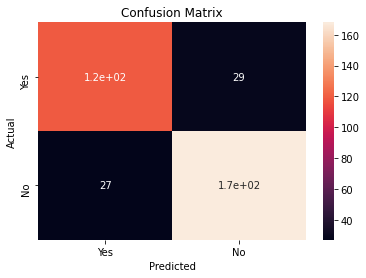

In [14]:
labels=["Yes","No"]

cm=confusion_matrix(actual_values,predicted_values,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted')

ax.set_ylabel('Actual')

ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels);ax.yaxis.set_ticklabels(labels)

In [15]:
accuracy=12+27/12+27+29+17
accuracy=39/85
print("accuracy is",accuracy)

accuracy is 0.4588235294117647
